In [119]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score, accuracy_score,precision_score

In [98]:
df = pd.read_csv("Train.txt",sep=",",names=["duration","protocoltype","service","flag","srcbytes","dstbytes","land", "wrongfragment","urgent","hot","numfailedlogins","loggedin", "numcompromised","rootshell","suattempted","numroot","numfilecreations", "numshells","numaccessfiles","numoutboundcmds","ishostlogin",
"isguestlogin","count","srvcount","serrorrate", "srvserrorrate",
"rerrorrate","srvrerrorrate","samesrvrate", "diffsrvrate", "srvdiffhostrate","dsthostcount","dsthostsrvcount","dsthostsamesrvrate", "dsthostdiffsrvrate","dsthostsamesrcportrate",
"dsthostsrvdiffhostrate","dsthostserrorrate","dsthostsrvserrorrate",
"dsthostrerrorrate","dsthostsrvrerrorrate","attack", "lastflag"])
df.head(100)

,duration,protocoltype,service,flag,srcbytes,dstbytes,land,wrongfragment,urgent,hot,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,0,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,0,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,2,tcp,smtp,SF,3065,331,0,0,0,0,...,0.48,0.02,0.00,0.02,0.01,0.02,0.00,0.00,normal,21
96,0,udp,other,SF,102,102,0,0,0,0,...,0.14,0.29,0.14,0.00,0.00,0.00,0.00,0.00,normal,21
97,0,tcp,http,SF,259,750,0,0,0,0,...,1.00,0.00,0.25,0.03,0.00,0.00,0.00,0.00,normal,21
98,1082,udp,other,SF,147,105,0,0,0,0,...,0.01,0.42,0.86,0.00,0.00,0.00,0.00,0.00,normal,21


In [99]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 43 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  object 
 2   service                 125973 non-null  object 
 3   flag                    125973 non-null  object 
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   land                    125973 non-null  int64  
 7   wrongfragment           125973 non-null  int64  
 8   urgent                  125973 non-null  int64  
 9   hot                     125973 non-null  int64  
 10  numfailedlogins         125973 non-null  int64  
 11  loggedin                125973 non-null  int64  
 12  numcompromised          125973 non-null  int64  
 13  rootshell               125973 non-null  int64  
 14  suattempted         

In [100]:
df.describe()

,duration,srcbytes,dstbytes,land,wrongfragment,urgent,hot,numfailedlogins,loggedin,numcompromised,...,dsthostsrvcount,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,lastflag
count,125973.00000,1.259730e+05,1.259730e+05,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,...,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000,125973.000000
mean,287.14465,4.556674e+04,1.977911e+04,0.000198,0.022687,0.000111,0.204409,0.001222,0.395736,0.279250,...,115.653005,0.521242,0.082951,0.148379,0.032542,0.284452,0.278485,0.118832,0.120240,19.504060
std,2604.51531,5.870331e+06,4.021269e+06,0.014086,0.253530,0.014366,2.149968,0.045239,0.489010,23.942042,...,110.702741,0.448949,0.188922,0.308997,0.112564,0.444784,0.445669,0.306557,0.319459,2.291503
min,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.00000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,10.000000,0.050000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.000000
50%,0.00000,4.400000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,63.000000,0.510000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,20.000000
75%,0.00000,2.760000e+02,5.160000e+02,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,255.000000,1.000000,0.070000,0.060000,0.020000,1.000000,1.000000,0.000000,0.000000,21.000000
max,42908.00000,1.379964e+09,1.309937e+09,1.000000,3.000000,3.000000,77.000000,5.000000,1.000000,7479.000000,...,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,21.000000


In [101]:
df.describe(include='O')

,protocoltype,service,flag,attack
count,125973,125973,125973,125973
unique,3,70,11,23
top,tcp,http,SF,normal
freq,102689,40338,74945,67343


In [102]:
df.columns

Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'land', 'wrongfragment', 'urgent', 'hot', 'numfailedlogins', 'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 'numoutboundcmds',
       'ishostlogin', 'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag'],
      dtype='object')

In [103]:
df_new=df[['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
        'wrongfragment',  'hot',  'loggedin',
       'numcompromised', 'rootshell', 'suattempted', 'numroot',
       'numfilecreations', 'numshells', 'numaccessfiles', 
        'isguestlogin', 'count', 'srvcount', 'serrorrate',
       'srvserrorrate', 'rerrorrate', 'srvrerrorrate', 'samesrvrate',
       'diffsrvrate', 'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostserrorrate', 'dsthostsrvserrorrate',
       'dsthostrerrorrate', 'dsthostsrvrerrorrate', 'attack', 'lastflag']].copy()

In [104]:
df_new.isnull().sum()

duration                  0
protocoltype              0
service                   0
flag                      0
srcbytes                  0
dstbytes                  0
wrongfragment             0
hot                       0
loggedin                  0
numcompromised            0
rootshell                 0
suattempted               0
numroot                   0
numfilecreations          0
numshells                 0
numaccessfiles            0
isguestlogin              0
count                     0
srvcount                  0
serrorrate                0
srvserrorrate             0
rerrorrate                0
srvrerrorrate             0
samesrvrate               0
diffsrvrate               0
srvdiffhostrate           0
dsthostcount              0
dsthostsrvcount           0
dsthostsamesrvrate        0
dsthostdiffsrvrate        0
dsthostsamesrcportrate    0
dsthostsrvdiffhostrate    0
dsthostserrorrate         0
dsthostsrvserrorrate      0
dsthostrerrorrate         0
dsthostsrvrerrorrate

In [105]:
df_new.query('service=="http"')

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
3,0,tcp,http,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
4,0,tcp,http,SF,199,420,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
12,0,tcp,http,SF,287,2251,0,0,1,0,...,1.00,0.00,0.12,0.03,0.00,0.00,0.00,0.00,normal,21
16,0,tcp,http,SF,300,13788,0,0,1,0,...,1.00,0.00,0.01,0.02,0.00,0.00,0.00,0.00,normal,21
18,0,tcp,http,SF,233,616,0,0,1,0,...,1.00,0.00,0.02,0.03,0.00,0.00,0.02,0.00,normal,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
125959,0,tcp,http,SF,373,4777,0,0,1,0,...,1.00,0.00,0.02,0.04,0.00,0.00,0.00,0.00,normal,21
125960,0,tcp,http,SF,329,885,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
125961,0,tcp,http,SF,236,2698,0,0,1,0,...,0.97,0.01,0.00,0.00,0.00,0.00,0.00,0.00,normal,21
125963,0,tcp,http,SF,334,1600,0,0,1,0,...,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,normal,21


In [106]:
df_new.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
125968    False
125969    False
125970    False
125971    False
125972    False
Length: 125973, dtype: bool

'~' this type of design is used for the compliment

In [107]:
df_new.loc[~df_new.duplicated(subset='service')]

,duration,protocoltype,service,flag,srcbytes,dstbytes,wrongfragment,hot,loggedin,numcompromised,...,dsthostsamesrvrate,dsthostdiffsrvrate,dsthostsamesrcportrate,dsthostsrvdiffhostrate,dsthostserrorrate,dsthostsrvserrorrate,dsthostrerrorrate,dsthostsrvrerrorrate,attack,lastflag
0,0,tcp,ftp_data,SF,491,0,0,0,0,0,...,0.17,0.03,0.17,0.00,0.00,0.00,0.05,0.00,normal,20
1,0,udp,other,SF,146,0,0,0,0,0,...,0.00,0.60,0.88,0.00,0.00,0.00,0.00,0.00,normal,15
2,0,tcp,private,S0,0,0,0,0,0,0,...,0.10,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,19
3,0,tcp,http,SF,232,8153,0,0,1,0,...,1.00,0.00,0.03,0.04,0.03,0.01,0.00,0.01,normal,21
8,0,tcp,remote_job,S0,0,0,0,0,0,0,...,0.09,0.05,0.00,0.00,1.00,1.00,0.00,0.00,neptune,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11124,0,tcp,http_8001,S0,0,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.13,1.00,0.87,0.00,satan,17
25718,0,tcp,aol,REJ,0,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.03,0.00,0.97,1.00,satan,17
45071,0,tcp,http_2784,REJ,0,0,0,0,0,0,...,0.00,1.00,0.00,0.00,0.10,0.00,0.88,1.00,satan,17
60799,0,udp,tftp_u,SF,1,0,0,0,0,0,...,0.02,0.06,0.02,0.00,0.00,0.00,0.00,0.00,normal,11


In [108]:
df_new.dtypes

duration                    int64
protocoltype               object
service                    object
flag                       object
srcbytes                    int64
dstbytes                    int64
wrongfragment               int64
hot                         int64
loggedin                    int64
numcompromised              int64
rootshell                   int64
suattempted                 int64
numroot                     int64
numfilecreations            int64
numshells                   int64
numaccessfiles              int64
isguestlogin                int64
count                       int64
srvcount                    int64
serrorrate                float64
srvserrorrate             float64
rerrorrate                float64
srvrerrorrate             float64
samesrvrate               float64
diffsrvrate               float64
srvdiffhostrate           float64
dsthostcount                int64
dsthostsrvcount             int64
dsthostsamesrvrate        float64
dsthostdiffsrv

In [109]:
obj_col=df_new.select_dtypes(include="object").columns
print(obj_col)

Index(['protocoltype', 'service', 'flag', 'attack'], dtype='object')


In [110]:
df_newM=df_new.copy()

In [111]:
le=LabelEncoder()
for i in obj_col:
    df_newM[i]=le.fit_transform(df_newM[i])
df_newM.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125973 entries, 0 to 125972
Data columns (total 38 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   duration                125973 non-null  int64  
 1   protocoltype            125973 non-null  int32  
 2   service                 125973 non-null  int32  
 3   flag                    125973 non-null  int32  
 4   srcbytes                125973 non-null  int64  
 5   dstbytes                125973 non-null  int64  
 6   wrongfragment           125973 non-null  int64  
 7   hot                     125973 non-null  int64  
 8   loggedin                125973 non-null  int64  
 9   numcompromised          125973 non-null  int64  
 10  rootshell               125973 non-null  int64  
 11  suattempted             125973 non-null  int64  
 12  numroot                 125973 non-null  int64  
 13  numfilecreations        125973 non-null  int64  
 14  numshells           

<Axes: >

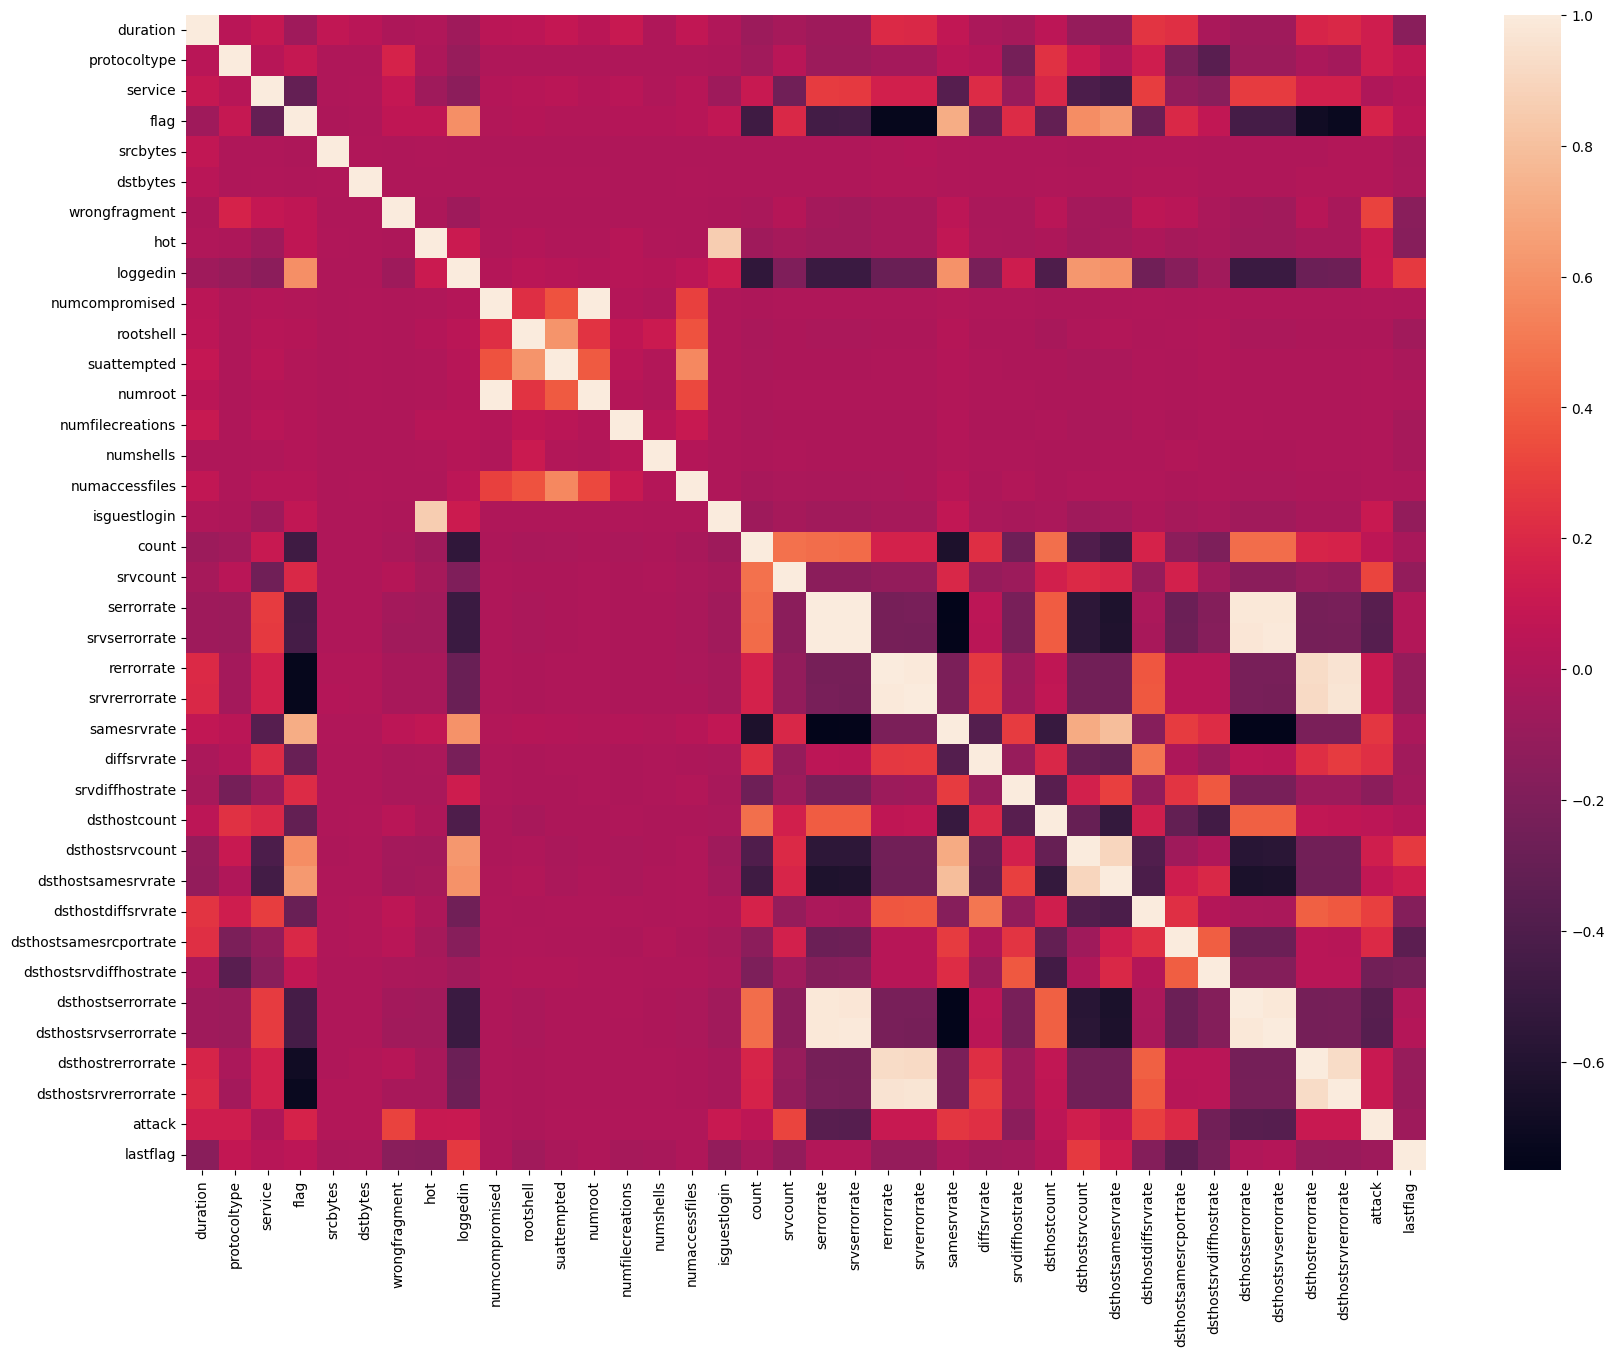

In [112]:
plt.figure(figsize=(20,15))
sns.heatmap(df_newM.corr(),annot=False)

In [113]:
colum=df_newM.columns.tolist()
column=set()
corr=df_newM.corr()
for i in range(len(colum)-1):
    for j in range(i+1 , len(colum)):
        if corr[colum[i]][colum[j]]>0.9:
            print(colum[i],colum[j],corr[colum[i]][colum[j]])
            column.add(colum[i])

print(column)  


numcompromised numroot 0.9988334525784719
serrorrate srvserrorrate 0.9932892425370462
serrorrate dsthostserrorrate 0.979373082984311
serrorrate dsthostsrvserrorrate 0.9811389586179897
srvserrorrate dsthostserrorrate 0.9775960119654399
srvserrorrate dsthostsrvserrorrate 0.9862517164931046
rerrorrate srvrerrorrate 0.9890076529820762
rerrorrate dsthostrerrorrate 0.9267485035758941
rerrorrate dsthostsrvrerrorrate 0.9644486655034351
srvrerrorrate dsthostrerrorrate 0.9178223356828635
srvrerrorrate dsthostsrvrerrorrate 0.9702079974522381
dsthostserrorrate dsthostsrvserrorrate 0.9850522227996314
dsthostrerrorrate dsthostsrvrerrorrate 0.9246878915781156
{'serrorrate', 'numcompromised', 'srvrerrorrate', 'dsthostserrorrate', 'srvserrorrate', 'rerrorrate', 'dsthostrerrorrate'}


In [114]:
column=list(column)
print(column)
df_newMm=df_newM.drop(column,axis=1)
df_newMm.columns


['serrorrate', 'numcompromised', 'srvrerrorrate', 'dsthostserrorrate', 'srvserrorrate', 'rerrorrate', 'dsthostrerrorrate']


Index(['duration', 'protocoltype', 'service', 'flag', 'srcbytes', 'dstbytes',
       'wrongfragment', 'hot', 'loggedin', 'rootshell', 'suattempted',
       'numroot', 'numfilecreations', 'numshells', 'numaccessfiles',
       'isguestlogin', 'count', 'srvcount', 'samesrvrate', 'diffsrvrate',
       'srvdiffhostrate', 'dsthostcount', 'dsthostsrvcount',
       'dsthostsamesrvrate', 'dsthostdiffsrvrate', 'dsthostsamesrcportrate',
       'dsthostsrvdiffhostrate', 'dsthostsrvserrorrate',
       'dsthostsrvrerrorrate', 'attack', 'lastflag'],
      dtype='object')

In [115]:
x=df_newMm.drop(["attack"],axis=1)
y=df_newMm["attack"]

In [116]:
sc=StandardScaler()
x_transformed=sc.fit_transform(x)
print(x_transformed)

[[-0.11024922 -0.12470616 -0.68678521 ... -0.6248708  -0.37638703
   0.21642633]
 [-0.11024922  2.21931185  0.78142753 ... -0.6248708  -0.37638703
  -1.9655564 ]
 [-0.11024922 -0.12470616  1.08730518 ...  1.6189552  -0.37638703
  -0.21997022]
 ...
 [-0.11024922 -0.12470616  1.39318283 ... -0.6248708  -0.37638703
  -0.65636676]
 [-0.11024922 -0.12470616 -0.0750299  ...  1.6189552  -0.37638703
   0.21642633]
 [-0.11024922 -0.12470616 -0.68678521 ... -0.6248708  -0.37638703
   0.65282288]]


In [118]:
x_train,x_test,y_train,y_test=train_test_split(x_transformed,y,test_size=0.3,random_state=42)
print(x_train.shape)
print(x_test.shape)

(88181, 30)
(37792, 30)


In [121]:
lr=LogisticRegression(max_iter=1000)
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
acc_score=accuracy_score(y_test,y_pred)

C:\Users\RISHU\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\linear_model\_logistic.py:460: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [122]:
print(acc_score)

0.9879604149026249
